- 비선형 지도학습 분류
1. Random Forest
2. KNN (k-최근접 이웃)
3. SVC (RBF 커널)
4. XGBoost / LightGBM 
5. MLP (다층 퍼셉트론)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('./data/online_retail_customer_churn.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def drop_feature(df):
    # 식별자 제거
    return df.drop('Customer_ID', axis=1)

def encode_feature(df):
    # 범주형 변수 원핫 인코딩
    category = ['Gender', 'Email_Opt_In', 'Promotion_Response']
    df_encoded = pd.get_dummies(df, columns=category, drop_first=True)
    return df_encoded

def remove_gender_other(df):
    """Gender가 'Other'인 행 제거"""
    df_cleaned = df[df['Gender'] != 'Other'].copy()
    return df_cleaned

def scale_features(df):
    scaler = StandardScaler()
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

def preprocess_for_svm(df):
    df = drop_feature(df)
    df = remove_gender_other(df)  # Gender 'Other' 제거
    df = encode_feature(df)
    df = df.dropna()  # 결측치 제거
    df = scale_features(df)  # 스케일링 적용
    return df


In [5]:
rt_df = preprocess_for_svm(df)

In [6]:
rt_df.head()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Target_Churn,Gender_Male,Gender_Other,Email_Opt_In_True,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,62,45.15,5892.58,5,22,453.80,2,0,3,129,True,False,True,True,True,False
1,65,79.51,9025.47,13,77,22.90,2,2,3,227,False,True,False,False,True,False
2,18,29.19,618.83,13,71,50.53,5,2,2,283,True,True,False,False,True,False
3,21,79.63,9110.30,3,33,411.83,5,3,5,226,True,False,True,True,False,False
4,21,77.66,5390.88,15,43,101.19,3,0,5,242,False,False,True,False,False,True


In [7]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1000 non-null   int64  
 1   Annual_Income                    1000 non-null   float64
 2   Total_Spend                      1000 non-null   float64
 3   Years_as_Customer                1000 non-null   int64  
 4   Num_of_Purchases                 1000 non-null   int64  
 5   Average_Transaction_Amount       1000 non-null   float64
 6   Num_of_Returns                   1000 non-null   int64  
 7   Num_of_Support_Contacts          1000 non-null   int64  
 8   Satisfaction_Score               1000 non-null   int64  
 9   Last_Purchase_Days_Ago           1000 non-null   int64  
 10  Target_Churn                     1000 non-null   bool   
 11  Gender_Male                      1000 non-null   bool   
 12  Gender_Other         

In [8]:
rt_df['Target_Churn'].value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# CSV 파일 로드
df = pd.read_csv('./data/online_retail_customer_churn.csv')

# 타겟 변수 이름을 'Target_Churn'로 수정
target = 'Target_Churn'

    # 전처리 적용
df_processed = preprocess_for_svm(df)

# 타겟 변수와 피처 분리
X = df_processed.drop(target, axis=1)
y = df_processed[target]
# 훈련셋과 테스트셋 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# SVM 모델 학습
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
# 훈련 데이터와 테스트 데이터에 대한 정확도 계산
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

# 평가 결과 출력 (Classification Report)
y_pred = svm_model.predict(X_test)

print(f'\n훈련 데이터 정확도: {train_accuracy:.4f}')
print(f'평가 데이터 정확도: {test_accuracy:.4f}\n')
print("Classification Report:")
print(classification_report(y_test, y_pred))



훈련 데이터 정확도: 0.7981
평가 데이터 정확도: 0.4485

Classification Report:
              precision    recall  f1-score   support

       False       0.40      0.31      0.35        65
        True       0.48      0.58      0.52        71

    accuracy                           0.45       136
   macro avg       0.44      0.44      0.44       136
weighted avg       0.44      0.45      0.44       136




[원본 데이터] 타겟 변수 분포:
Target_Churn
True     526
False    474
Name: count, dtype: int64


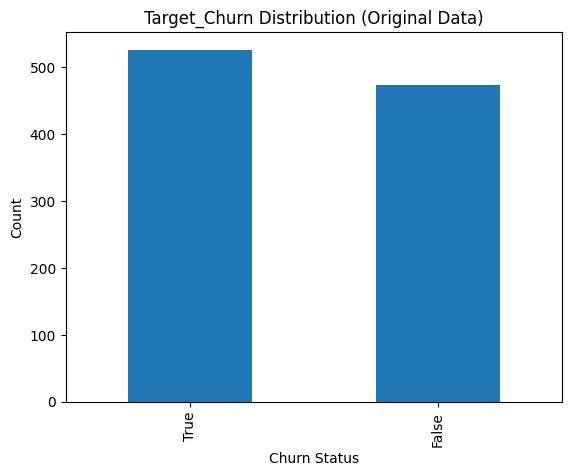


[훈련 데이터] 타겟 변수 분포 (오버샘플링 전):
Target_Churn
True     277
False    263
Name: count, dtype: int64

[훈련 데이터] 타겟 변수 분포 (오버샘플링 후):
Target_Churn
True     277
False    277
Name: count, dtype: int64


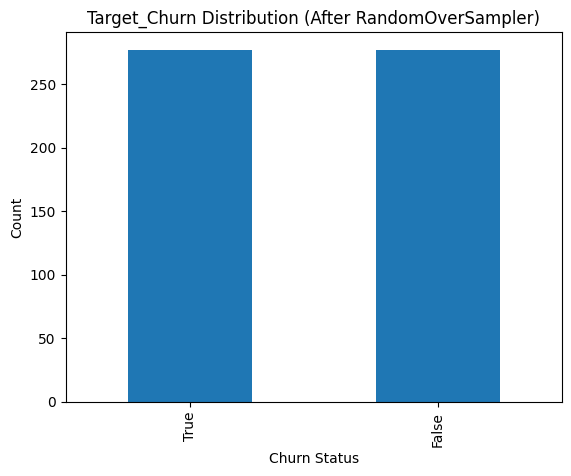

=== SVM 모델 성능 (Imbalanced Training Data) ===
평가 데이터 정확도: 0.4485
Classification Report:
              precision    recall  f1-score   support

       False       0.40      0.31      0.35        65
        True       0.48      0.58      0.52        71

    accuracy                           0.45       136
   macro avg       0.44      0.44      0.44       136
weighted avg       0.44      0.45      0.44       136


=== SVM 모델 성능 (Oversampled Training Data) ===
평가 데이터 정확도: 0.4779
Classification Report:
              precision    recall  f1-score   support

       False       0.45      0.40      0.42        65
        True       0.50      0.55      0.52        71

    accuracy                           0.48       136
   macro avg       0.47      0.47      0.47       136
weighted avg       0.48      0.48      0.48       136



In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# CSV 파일 로드
df = pd.read_csv('./data/online_retail_customer_churn.csv')

# 타겟 변수 확인 및 분포 시각화
target = 'Target_Churn'
print("\n[원본 데이터] 타겟 변수 분포:")
print(df[target].value_counts())

df[target].value_counts().plot(kind='bar')
plt.title("Target_Churn Distribution (Original Data)")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()

# 전처리 적용 (타겟 변수는 삭제하지 않도록 주의)
df_processed = preprocess_for_svm(df)

# 타겟 변수와 피처 분리
X = df_processed.drop(target, axis=1)
y = df_processed[target]

# 훈련/테스트 셋 분할 (테스트 셋은 오버샘플링 전 동일하게 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n[훈련 데이터] 타겟 변수 분포 (오버샘플링 전):")
print(y_train.value_counts())

# 오버샘플링 적용 (훈련 데이터에 한해서)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("\n[훈련 데이터] 타겟 변수 분포 (오버샘플링 후):")
print(pd.Series(y_resampled).value_counts())

pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title("Target_Churn Distribution (After RandomOverSampler)")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()

# ----------------------------
# SVM 모델 학습 및 성능 비교
# ----------------------------

# 1. 오버샘플링 전 (imbalanced) 데이터로 모델 학습
svm_model_imbalanced = SVC(random_state=42)
svm_model_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = svm_model_imbalanced.predict(X_test)
accuracy_imbalanced = svm_model_imbalanced.score(X_test, y_test)
report_imbalanced = classification_report(y_test, y_pred_imbalanced)

print("=== SVM 모델 성능 (Imbalanced Training Data) ===")
print(f"평가 데이터 정확도: {accuracy_imbalanced:.4f}")
print("Classification Report:")
print(report_imbalanced)

# 2. 오버샘플링 후 데이터로 모델 학습
svm_model_oversampled = SVC(random_state=42)
svm_model_oversampled.fit(X_resampled, y_resampled)
y_pred_oversampled = svm_model_oversampled.predict(X_test)
accuracy_oversampled = svm_model_oversampled.score(X_test, y_test)
report_oversampled = classification_report(y_test, y_pred_oversampled)

print("\n=== SVM 모델 성능 (Oversampled Training Data) ===")
print(f"평가 데이터 정확도: {accuracy_oversampled:.4f}")
print("Classification Report:")
print(report_oversampled)


In [67]:
# Re-import necessary modules due to kernel reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import optuna
import matplotlib.pyplot as plt

# Reload the dataset
df = pd.read_csv("./data/online_retail_customer_churn.csv")

# Drop identifier and rows with 'Other' gender
df = df[df['Gender'] != 'Other']
df = df.drop('Customer_ID', axis=1)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Email_Opt_In', 'Promotion_Response'], drop_first=True)

# Split features and target
X = df.drop("Target_Churn", axis=1)
y = df["Target_Churn"].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale numerical features
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Apply SMOTE
# smote = SMOTE(random_state=42, sampling_strategy={0:5000, 1:5000})
smote = SMOTE(random_state=42, sampling_strategy='auto')
# smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define Optuna objective
def objective(trial):
    # 여기에 추가!
    class_weight = trial.suggest_categorical(
        "class_weight",
        ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
    )

    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 150),
        max_depth=trial.suggest_int("max_depth", 3, 7),
        min_samples_split=trial.suggest_int("min_samples_split", 10, 100),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 5, 30),
        max_leaf_nodes=trial.suggest_int("max_leaf_nodes", 10, 100),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        max_samples=trial.suggest_float("max_samples", 0.5, 0.7),
        bootstrap=True,
        class_weight=class_weight,  # 👉 이 부분에 반영됨
        random_state=42,
        n_jobs=-1
    )

    from sklearn.model_selection import cross_val_score, StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_resampled, y_train_resampled, scoring="f1", cv=cv)
    return score.mean()


# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Update best parameters with overrides
best_params = study.best_trial.params.copy()
best_params.update({
    "max_depth": 3,
    "n_estimator": 70,
    "class_weight": "balanced",
    "random_state": 42
})

# Train and evaluate the final model
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_resampled, y_train_resampled)
y_pred = best_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

{
    "Best_Params": best_params,
    "Train_Accuracy": best_rf.score(X_train_resampled, y_train_resampled),
    "Test_Accuracy": accuracy,
    "Confusion_Matrix": conf_matrix,
    "Classification_Report": report
}

# 평가 결과 출력
print("\n[Random Forest 최종 모델 성능 평가]")
print("Best Parameters:")
for k, v in best_params.items():
    print(f"  - {k}: {v}")

print(f"\n훈련 정확도: {best_rf.score(X_train_resampled, y_train_resampled):.3f}")
print(f"테스트 정확도: {accuracy:.3f}")

# 혼동 행렬 출력
print("\nConfusion Matrix:")
conf_df = pd.DataFrame(
    conf_matrix,
    index=["Actual: 0 (비이탈)", "Actual: 1 (이탈)"],
    columns=["Predicted: 0", "Predicted: 1"]
)
display(conf_df)

# 분류 리포트 출력
print("\nClassification Report:")
report_df = pd.DataFrame(report).transpose()
display(report_df.round(3))

importances = best_rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feat_imp.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


[I 2025-04-01 11:18:46,239] A new study created in memory with name: no-name-8a324dce-27db-4681-be7b-51dcc284040b
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 2} which is of type dict.
  warnings.warn(message)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 3} which is of type dict.
  warnings.warn(message)
[I 2025-04-01 11:18:46,858] Trial 0 finished with value: 0.48580159419088426 and parameters: {'class_weight': 'balanced', 'n_estimators': 83, 'max_depth': 7, 'min_samples_split': 84, 'min_samples_leaf': 12, 'max_leaf_nodes': 48, 'max_features': 'sqrt', 'max_samples': 0.61

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'n_estimator'

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv("./data/online_retail_customer_churn.csv")

# Drop 'Other' gender and 'Customer_ID'
df = df[df['Gender'] != 'Other']
df = df.drop('Customer_ID', axis=1)

# Create new engineered features
df['Spend_to_Income_Ratio'] = df['Total_Spend'] / (df['Annual_Income'] * 1000 + 1)
df['Return_Rate'] = df['Num_of_Returns'] / (df['Num_of_Purchases'] + 1)
df['Support_per_Purchase'] = df['Num_of_Support_Contacts'] / (df['Num_of_Purchases'] + 1)
df['Avg_Spend_vs_Total'] = df['Average_Transaction_Amount'] / (df['Total_Spend'] + 1)

# Display a sample
df.head()


,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Spend_to_Income_Ratio,Return_Rate,Support_per_Purchase,Avg_Spend_vs_Total
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False,0.113512,0.025641,0.025641,0.002537
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True,0.021199,0.069444,0.027778,0.081522
5,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False,0.001340,0.058140,0.011628,1.630743
6,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False,0.020406,0.000000,0.038462,0.089989
10,54,Male,138.90,4283.84,15,33,96.55,9,1,2,92,True,Responded,False,0.030841,0.264706,0.029412,0.022533


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
df = pd.read_csv("./data/online_retail_customer_churn.csv")

# 2. 전처리 함수 정의
def preprocess(df):
    df = df.drop(columns=['Customer_ID'], errors='ignore')
    df = df[df['Gender'] != 'Other'].copy()

    # 파생 변수 생성
    df['Spend_to_Income_Ratio'] = df['Total_Spend'] / (df['Annual_Income'] * 1000 + 1)
    df['Return_Rate'] = df['Num_of_Returns'] / (df['Num_of_Purchases'] + 1)
    df['Support_per_Purchase'] = df['Num_of_Support_Contacts'] / (df['Num_of_Purchases'] + 1)
    df['Avg_Spend_vs_Total'] = df['Average_Transaction_Amount'] / (df['Total_Spend'] + 1)

    # 원핫 인코딩
    df = pd.get_dummies(df, columns=['Gender', 'Email_Opt_In', 'Promotion_Response'], drop_first=True)
    return df

# 3. 전처리 적용
df = preprocess(df)

# 4. 특성과 타겟 분리
X = df.drop("Target_Churn", axis=1)
y = df["Target_Churn"].astype(int)

# 5. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 6. 수치형 피처만 스케일링
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 7. SVM 모델 학습
svm_model = SVC(probability=True, random_state=0)
svm_model.fit(X_train_scaled, y_train)

# 8. 예측
y_pred = svm_model.predict(X_test_scaled)

# 9. 성능 출력
print("\n[SVM 모델 성능 평가 - 파생 변수 포함]")
print(f"훈련 정확도: {svm_model.score(X_train_scaled, y_train):.3f}")
print(f"평가 정확도: {accuracy_score(y_test, y_pred):.3f}")

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, 
                       index=["Actual: 0 (비이탈)", "Actual: 1 (이탈)"],
                       columns=["Predicted: 0", "Predicted: 1"])
print("\nConfusion Matrix:")
print(conf_df)

# 리포트
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



[SVM 모델 성능 평가 - 파생 변수 포함]
훈련 정확도: 0.753
평가 정확도: 0.517

Confusion Matrix:
                 Predicted: 0  Predicted: 1
Actual: 0 (비이탈)            32            75
Actual: 1 (이탈)             23            73

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.30      0.40       107
           1       0.49      0.76      0.60        96

    accuracy                           0.52       203
   macro avg       0.54      0.53      0.50       203
weighted avg       0.54      0.52      0.49       203



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 💡 과적합 완화: C를 줄이고 gamma는 적당히 (C 작을수록 규제 강화)
svm_model = SVC(C=0.5, gamma=0.01, kernel='rbf', probability=True, random_state=0)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

# 평가 출력
print("[SVM 모델 성능 평가 - 과적합 완화]")
print(f"훈련 정확도: {svm_model.score(X_train_scaled, y_train):.3f}")
print(f"테스트 정확도: {svm_model.score(X_test_scaled, y_test):.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

[SVM 모델 성능 평가 - 과적합 완화]
훈련 정확도: 0.537
테스트 정확도: 0.473

Confusion Matrix:
[[  1 106]
 [  1  95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       107
           1       0.47      0.99      0.64        96

    accuracy                           0.47       203
   macro avg       0.49      0.50      0.33       203
weighted avg       0.49      0.47      0.31       203



In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('./data/online_retail_customer_churn.csv')

# 불필요한 컬럼 및 'Other' 성별 제거
df = df[df['Gender'] != 'Other']
df.drop(columns=['Customer_ID'], inplace=True)

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['Gender', 'Email_Opt_In', 'Promotion_Response'], drop_first=True)

# 특성과 타겟 분리
X = df.drop("Target_Churn", axis=1)
y = df["Target_Churn"].astype(int)

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 수치형 피처 스케일링
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 2. 각 개별 모델 정의
svm = SVC(C=1.0, gamma=0.15, kernel='rbf', probability=True, class_weight='balanced', random_state=0)
logreg = LogisticRegression(C=1.0, max_iter=1000, class_weight='balanced', solver='liblinear', random_state=0)
rf = RandomForestClassifier(n_estimators=100, max_depth=4, class_weight='balanced', random_state=0)

# 3. VotingClassifier 정의 (soft voting)
voting_clf = VotingClassifier(
    estimators=[('svm', svm), ('logreg', logreg), ('rf', rf)],
    voting='soft'
)

# 4. 학습 및 예측
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

# 5. 평가
print("\n[SVM + LogisticRegression + RandomForest - Soft Voting 앙상블 결과]")
print("훈련 정확도:", voting_clf.score(X_train_scaled, y_train))
print("테스트 정확도:", voting_clf.score(X_test_scaled, y_test))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(
    conf_matrix,
    index=["Actual: 0 (비이탈)", "Actual: 1 (이탈)"],
    columns=["Predicted: 0", "Predicted: 1"]
)
print(conf_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



[SVM + LogisticRegression + RandomForest - Soft Voting 앙상블 결과]
훈련 정확도: 0.5200845665961945
테스트 정확도: 0.5221674876847291

Confusion Matrix:
                 Predicted: 0  Predicted: 1
Actual: 0 (비이탈)            30            77
Actual: 1 (이탈)             20            76

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.28      0.38       107
           1       0.50      0.79      0.61        96

    accuracy                           0.52       203
   macro avg       0.55      0.54      0.50       203
weighted avg       0.55      0.52      0.49       203



In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 모델 구성 - SVM, Logistic Regression, Random Forest
svm_best = SVC(C=1.0, gamma=0.1, kernel='rbf', class_weight='balanced', probability=True, random_state=0)
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0)
rf = RandomForestClassifier(
    n_estimators=80, max_depth=4, min_samples_split=10,
    min_samples_leaf=8, max_leaf_nodes=80, max_features='sqrt',
    max_samples=0.75, class_weight='balanced', random_state=42
)

# 앙상블 모델 구성 - VotingClassifier (SVM 중심, 균형적 가중치로 재튜닝)
voting_model = VotingClassifier(
    estimators=[('svm', svm_best), ('logreg', logreg), ('rf', rf)],
    voting='soft',
    weights=[1, 3, 1]
)

# 학습 및 예측
voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)

# 정확도 계산
train_score = voting_model.score(X_train_scaled, y_train)
test_score = voting_model.score(X_test_scaled, y_test)

# 평가 지표
conf_matrix = confusion_matrix(y_test, y_pred_voting)
report = classification_report(y_test, y_pred_voting, output_dict=True)

# 정리된 결과 출력용
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=["Actual: 0 (비이탈)", "Actual: 1 (이탈)"],
    columns=["Predicted: 0", "Predicted: 1"]
)

report_df = pd.DataFrame(report).transpose().round(3)

train_score, test_score, conf_matrix_df, report_df



Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.28      0.38       107
           1       0.50      0.79      0.61        96

    accuracy                           0.52       203
   macro avg       0.55      0.54      0.50       203
weighted avg       0.55      0.52      0.49       203



In [66]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 3. 수치형 피처 스케일링
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4. NumPy 배열로 변환 (교차 검증 시 인덱스 문제 해결을 위해)
X_train_arr = X_train_scaled.values
y_train_arr = y_train.values
X_test_arr = X_test_scaled.values
y_test_arr = y_test.values

# 5. Optuna Objective 함수 (VotingClassifier 앙상블 튜닝)
def objective(trial):
    # SVM 하이퍼파라미터
    svm_C = trial.suggest_float("svm_C", 0.1, 5.0, log=True)
    svm_gamma = trial.suggest_float("svm_gamma", 0.001, 0.1, log=True)
    
    # RandomForest 하이퍼파라미터
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 50, 100)
    rf_max_depth = trial.suggest_int("rf_max_depth", 3, 6)
    
    # Voting 가중치
    w_svm = trial.suggest_int("w_svm", 1, 3)
    w_log = trial.suggest_int("w_log", 1, 3)
    w_rf  = trial.suggest_int("w_rf", 1, 3)
    
    # 개별 모델 정의
    svm = SVC(
        C=svm_C,
        gamma=svm_gamma,
        kernel='rbf',
        class_weight='balanced',
        probability=True,
        random_state=0
    )
    
    logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0)
    
    rf = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    )
    
    # Voting 앙상블 구성 (soft voting)
    voting_model = VotingClassifier(
        estimators=[('svm', svm), ('logreg', logreg), ('rf', rf)],
        voting='soft',
        weights=[w_svm, w_log, w_rf]
    )
    
    # Stratified KFold 교차 검증 (NumPy 배열 → DataFrame로 복원)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, valid_idx in cv.split(X_train_arr, y_train_arr):
        # NumPy 배열 슬라이싱
        X_tr, X_val = X_train_arr[train_idx], X_train_arr[valid_idx]
        y_tr, y_val = y_train_arr[train_idx], y_train_arr[valid_idx]
        # DataFrame으로 복원 (원래 컬럼 유지)
        X_tr_df = pd.DataFrame(X_tr, columns=X_train_scaled.columns)
        X_val_df = pd.DataFrame(X_val, columns=X_train_scaled.columns)
        
        voting_model.fit(X_tr_df, y_tr)
        preds = voting_model.predict(X_val_df)
        scores.append(f1_score(y_val, preds, average='weighted'))
    return np.mean(scores)

# 6. Optuna 스터디 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# 7. 최적 하이퍼파라미터 출력
best_params = study.best_trial.params
print("\n[Best Hyperparameters from Optuna]")
for k, v in best_params.items():
    print(f"  - {k}: {v}")

# 8. 최적 파라미터로 개별 모델 재정의
svm_best = SVC(
    C=best_params['svm_C'],
    gamma=best_params['svm_gamma'],
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=0
)
logreg_best = LogisticRegression(max_iter=1000, class_weight='balanced',  random_state=0)
rf_best = RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# 9. 최적 가중치를 적용한 VotingClassifier 구성
voting_model = VotingClassifier(
    estimators=[('svm', svm_best), ('logreg', logreg_best), ('rf', rf_best)],
    voting='soft',
    weights=[best_params['w_svm'], best_params['w_log'], best_params['w_rf']]
)

# 10. 최종 모델 학습 및 평가 (NumPy 배열이 아닌 DataFrame 사용)
voting_model.fit(X_train_scaled, y_train)
y_pred = voting_model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, voting_model.predict(X_train_scaled))
test_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# 11. 결과 출력
print("\n[최종 VotingClassifier 앙상블 성능 평가]")
print(f"훈련 정확도: {train_acc:.3f}")
print(f"테스트 정확도: {test_acc:.3f}\n")

conf_df = pd.DataFrame(
    conf_mat,
    index=["Actual: 0 (비이탈)", "Actual: 1 (이탈)"],
    columns=["Predicted: 0", "Predicted: 1"]
)
print("Confusion Matrix:")
print(conf_df)

print("\nClassification Report:")
report_df = pd.DataFrame(report_dict).transpose().round(3)
print(report_df)


[I 2025-04-01 11:08:31,282] A new study created in memory with name: no-name-6e10ee28-ab49-4dc5-880a-c22af9a9851e
[I 2025-04-01 11:08:31,933] Trial 0 finished with value: 0.5060971422456578 and parameters: {'svm_C': 1.8984474343684894, 'svm_gamma': 0.02402991114805332, 'rf_n_estimators': 99, 'rf_max_depth': 6, 'w_svm': 3, 'w_log': 3, 'w_rf': 2}. Best is trial 0 with value: 0.5060971422456578.
[I 2025-04-01 11:08:32,397] Trial 1 finished with value: 0.49434515568742726 and parameters: {'svm_C': 0.5649245769176151, 'svm_gamma': 0.004314583209839687, 'rf_n_estimators': 67, 'rf_max_depth': 3, 'w_svm': 3, 'w_log': 2, 'w_rf': 2}. Best is trial 0 with value: 0.5060971422456578.
[I 2025-04-01 11:08:32,816] Trial 2 finished with value: 0.5142249354201356 and parameters: {'svm_C': 0.19780016746827586, 'svm_gamma': 0.014309631918260837, 'rf_n_estimators': 51, 'rf_max_depth': 6, 'w_svm': 3, 'w_log': 3, 'w_rf': 2}. Best is trial 2 with value: 0.5142249354201356.
[I 2025-04-01 11:08:33,297] Trial 3 


[Best Hyperparameters from Optuna]
  - svm_C: 1.6790490502143491
  - svm_gamma: 0.085645640201387
  - rf_n_estimators: 74
  - rf_max_depth: 5
  - w_svm: 1
  - w_log: 3
  - w_rf: 1

[최종 VotingClassifier 앙상블 성능 평가]
훈련 정확도: 0.641
테스트 정확도: 0.483

Confusion Matrix:
                 Predicted: 0  Predicted: 1
Actual: 0 (비이탈)            48            50
Actual: 1 (이탈)             55            50

Classification Report:
              precision  recall  f1-score  support
0                 0.466   0.490     0.478   98.000
1                 0.500   0.476     0.488  105.000
accuracy          0.483   0.483     0.483    0.483
macro avg         0.483   0.483     0.483  203.000
weighted avg      0.484   0.483     0.483  203.000
